In [1]:
from google.colab import files # чтобы загружать файлы в облако через проводник 
uploaded = files.upload() #просто запускаем и выбираем файл  API токена в проводнике

#↓ строка которая активирует наш API токен
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
     
#↓ добавился восклицательный знак, потому что это колаб
!kaggle competitions download -c mds-ufu-dl-test


#↓ "распакуй" + имя архива
!unzip mds-ufu-dl-test.zip
     

Saving kaggle.json to kaggle.json
 84% 14.0M/16.7M [00:01<00:00, 9.99MB/s]
100% 16.7M/16.7M [00:01<00:00, 9.15MB/s]
Archive:  mds-ufu-dl-test.zip
  inflating: fmnist_test.csv         
  inflating: fmnist_train.csv        
  inflating: sample_submission.csv   


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [3]:
random.set_seed(44)
fashion = ['T-shirt/top',' Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [5]:
data = pd.read_csv('fmnist_train.csv')
data.head(1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
y = data['label']
X = data.drop('label',axis=1)
X.shape,y.shape

((17040, 785), (17040,))

In [20]:
X.drop("Id",inplace=True,axis=1)

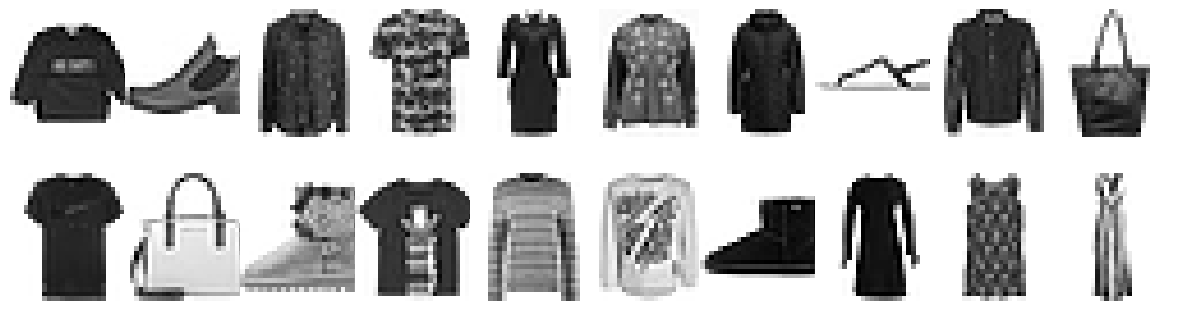

In [96]:
plt.figure(figsize=(15,4.5))
for i in range(20):  
    plt.subplot(2, 10, i+1)
    plt.imshow(X[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

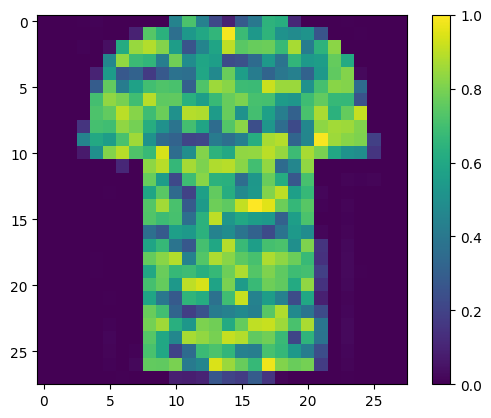

In [97]:
plt.figure()
plt.imshow(X[3].reshape((28,28)))
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
input_shape = [None, 28, 28, 1]
X = X/255.
X=X.values
X= X.reshape(-1, input_shape[1], 
                          input_shape[2], input_shape[3])
y = to_categorical(y,num_classes=10)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11928, 28, 28, 1), (5112, 28, 28, 1), (11928, 10), (5112, 10))

In [23]:
inputs = Input(shape=(28,28,1))

x = Conv2D(8,(3,3),padding='same',activation='relu')(inputs)
x = MaxPool2D()(x)
x = Dropout(0.1)(x)

x = Conv2D(64,(3,3),activation='relu')(x)
x = MaxPool2D()(x)
x = Dropout(0.1)(x)

x = Flatten()(x)
x = Dense(128,activation='relu')(x)
x = Dense(10,activation='softmax')(x)

model = Model(inputs=inputs,outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        4672      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                         

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train,y = y_train, epochs=15, validation_data=(X_test,y_test))
# history = model.fit(dataAug.flow(X_train,y_train),epochs=20,validation_data=(X_test,y_test))

Epoch 1/15
373/373 [==============================] - 14s 32ms/step - loss: 0.7204 - accuracy: 0.7331 - val_loss: nan - val_accuracy: 0.8187
Epoch 2/15
373/373 [==============================] - 11s 31ms/step - loss: 0.4712 - accuracy: 0.8255 - val_loss: nan - val_accuracy: 0.8494
Epoch 3/15
373/373 [==============================] - 13s 36ms/step - loss: 0.4075 - accuracy: 0.8487 - val_loss: nan - val_accuracy: 0.8539
Epoch 4/15
373/373 [==============================] - 12s 31ms/step - loss: 0.3707 - accuracy: 0.8594 - val_loss: nan - val_accuracy: 0.8685
Epoch 5/15
373/373 [==============================] - 12s 31ms/step - loss: 0.3326 - accuracy: 0.8741 - val_loss: nan - val_accuracy: 0.8760
Epoch 6/15
373/373 [==============================] - 12s 31ms/step - loss: 0.3065 - accuracy: 0.8850 - val_loss: nan - val_accuracy: 0.8777
Epoch 7/15
373/373 [==============================] - 12s 31ms/step - loss: 0.2827 - accuracy: 0.8954 - val_loss: nan - val_accuracy: 0.8862
Epoch 8/15
37

In [25]:
test = pd.read_csv('fmnist_test.csv')
test.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
my_test=test.copy()
my_test.drop("Id",axis=1,inplace=True)

In [27]:
my_test= my_test/255.

my_test= my_test.values.reshape(-1, input_shape[1], 
                          input_shape[2], input_shape[3])

In [28]:
ypred = model.predict(my_test)


313/313 [==============================] - 3s 8ms/step


In [86]:
y_pred = []
for i in range(len(ypred)):
    y_pred.append(ypred[i].argmax())

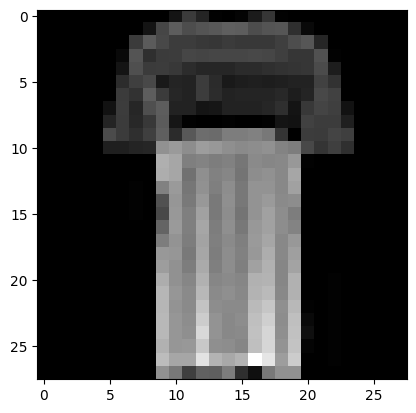

In [99]:
plt.imshow(my_test[563],cmap='gray')


In [88]:
Submission = pd.read_csv('/content/sample_submission.csv')

In [89]:
Submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      10000 non-null  int64
 1   label   10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


In [90]:
Submission['label'] = y_pred

In [93]:
#Submission.Id=Submission.Id.astype("category",)
Submission.rename(columns = {'label':'Category'}, inplace = True)
Submission.Category=Submission.Category.astype("int64",)
Submission.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Id        10000 non-null  int64
 1   Category  10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


In [94]:
Submission.to_csv('/content/My_Submission_dl.csv',index=False) 

In [95]:
#                                ↓ соревнование         ↓ название файла     ↓ комментарий 
!kaggle competitions submit -c mds-ufu-dl-test -f My_Submission_dl.csv -m " prediction test" 
     

100% 67.3k/67.3k [00:01<00:00, 40.2kB/s]
Successfully submitted to [MDS-UFU-DL-TEST] Построение классификатора

#additional

In [104]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout


img_rows, img_cols = 28, 28
num_classes = 10

def data_prep(raw):
    out_y = to_categorical(raw.label, num_classes)

    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

train_file = "fmnist_train.csv"
raw_data = pd.read_csv(train_file)
raw_data.drop("Id",axis=1,inplace=True)
x, y = data_prep(raw_data)

model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x, y,
          batch_size=128,
          epochs=10,
          validation_split = 0.2)

Epoch 1/10
107/107 [==============================] - 32s 288ms/step - loss: 0.6460 - accuracy: 0.7735 - val_loss: nan - val_accuracy: 0.8407
Epoch 2/10
107/107 [==============================] - 20s 191ms/step - loss: 0.3792 - accuracy: 0.8642 - val_loss: nan - val_accuracy: 0.8506
Epoch 3/10
107/107 [==============================] - 19s 177ms/step - loss: 0.3042 - accuracy: 0.8892 - val_loss: nan - val_accuracy: 0.8641
Epoch 4/10
107/107 [==============================] - 20s 190ms/step - loss: 0.2641 - accuracy: 0.9034 - val_loss: nan - val_accuracy: 0.8706
Epoch 5/10
107/107 [==============================] - 20s 188ms/step - loss: 0.2141 - accuracy: 0.9244 - val_loss: nan - val_accuracy: 0.8759
Epoch 6/10
107/107 [==============================] - 23s 216ms/step - loss: 0.1817 - accuracy: 0.9335 - val_loss: nan - val_accuracy: 0.8812
Epoch 7/10
107/107 [==============================] - 19s 176ms/step - loss: 0.1522 - accuracy: 0.9464 - val_loss: nan - val_accuracy: 0.8838
Epoch 